# Kickstarter Project: Exploratory Data Analysis

## Import Dataset

In [5]:
"""
Kickstarter Project: Enhanced Exploratory Data Analysis
This script provides a comprehensive exploratory analysis of the Kickstarter dataset,
focusing on understanding patterns and features that predict project success.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.ticker as mtick
from scipy import stats

# Set visual style for modern visualization
plt.style.use('default')
sns.set_theme(style="whitegrid")
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Read the Kickstarter dataset
print("Loading Kickstarter dataset...")
df = pd.read_excel("/Users/jaeyoonlee/Desktop/Kickstarter.xlsx")
print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns.")

Loading Kickstarter dataset...
Dataset loaded with 15215 rows and 46 columns.


In [6]:
# --------------------------------------------------------
# 1. Comprehensive Data Overview and Cleaning
# --------------------------------------------------------

print("\n=== DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")

# Display column information
print("\nColumn names and data types:")
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

# Basic statistics
print("\nBasic statistics for numeric columns:")
print(df.describe().T)

# Check for missing values
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print("\nMissing values per column:")
    print(missing_values[missing_values > 0])
else:
    print("\nNo missing values found in the dataset.")

# Check for duplicates
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

# Filter only successful and failed projects (as required by the assignment)
df = df[df['state'].isin(['successful', 'failed'])]
print(f"\nFiltered dataset to include only successful and failed projects: {df.shape[0]} rows")


=== DATASET OVERVIEW ===
Dataset shape: (15215, 46)

Column names and data types:
id: int64
name: object
goal: int64
pledged: float64
state: object
disable_communication: bool
country: object
currency: object
deadline: datetime64[ns]
state_changed_at: datetime64[ns]
created_at: datetime64[ns]
launched_at: datetime64[ns]
staff_pick: bool
backers_count: int64
static_usd_rate: float64
usd_pledged: float64
category: object
spotlight: bool
name_len: int64
name_len_clean: int64
blurb_len: int64
blurb_len_clean: int64
deadline_weekday: object
state_changed_at_weekday: object
created_at_weekday: object
launched_at_weekday: object
deadline_month: int64
deadline_day: int64
deadline_yr: int64
deadline_hr: int64
state_changed_at_month: int64
state_changed_at_day: int64
state_changed_at_yr: int64
state_changed_at_hr: int64
created_at_month: int64
created_at_day: int64
created_at_yr: int64
created_at_hr: int64
launched_at_month: int64
launched_at_day: int64
launched_at_yr: int64
launched_at_hr: int


=== TARGET VARIABLE ANALYSIS ===
State distribution:
state
successful    8351
failed        6112
Name: count, dtype: int64
Success rate: 57.74%


/var/folders/p4/78tsv97n1x17vnr6ql85fmqh0000gn/T/ipykernel_27740/4101825494.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='state', data=df, palette=['#FF5252', '#4CAF50'])


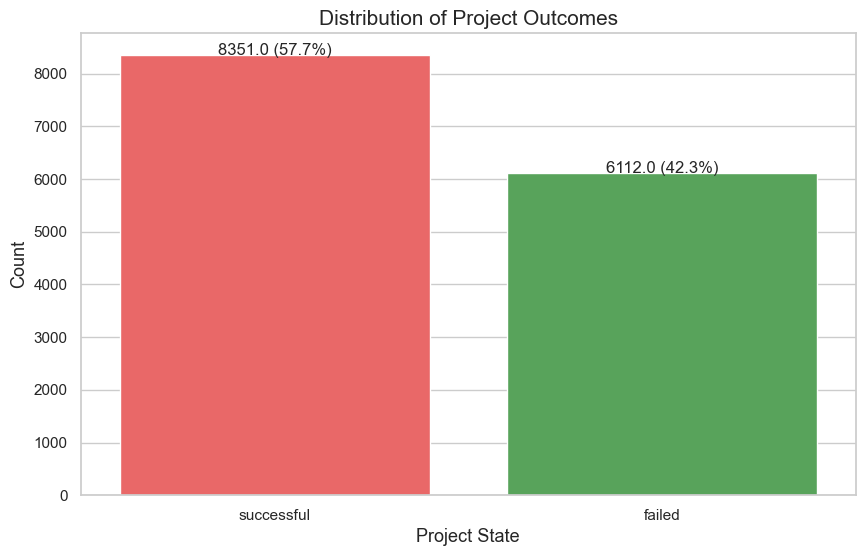

In [7]:
# --------------------------------------------------------
# 2. Target Variable Analysis
# --------------------------------------------------------

print("\n=== TARGET VARIABLE ANALYSIS ===")
target_counts = df['state'].value_counts()
print("State distribution:")
print(target_counts)
print(f"Success rate: {(target_counts['successful'] / df.shape[0] * 100):.2f}%")

# Visualize target distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='state', data=df, palette=['#FF5252', '#4CAF50'])
plt.title('Distribution of Project Outcomes', fontsize=15)
plt.xlabel('Project State', fontsize=13)
plt.ylabel('Count', fontsize=13)

# Add count and percentage labels on bars
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 0.1,
            f'{height} ({height/total:.1%})',
            ha="center", fontsize=12)

plt.show()


=== FEATURE ANALYSIS (AVAILABLE AT LAUNCH) ===
Number of features available at launch time: 22
Number of post-launch features (cannot be used for prediction): 10

Project Duration Statistics (Days):
count    14463.00
mean        33.87
std         12.98
min          1.00
25%         29.96
50%         30.00
75%         37.52
max        120.59
Name: project_duration, dtype: float64

Preparation Time Statistics (Days):
count    14463.00
mean        65.81
std        205.07
min          0.01
25%          4.01
50%         14.00
75%         44.71
max       3899.58
Name: preparation_time, dtype: float64


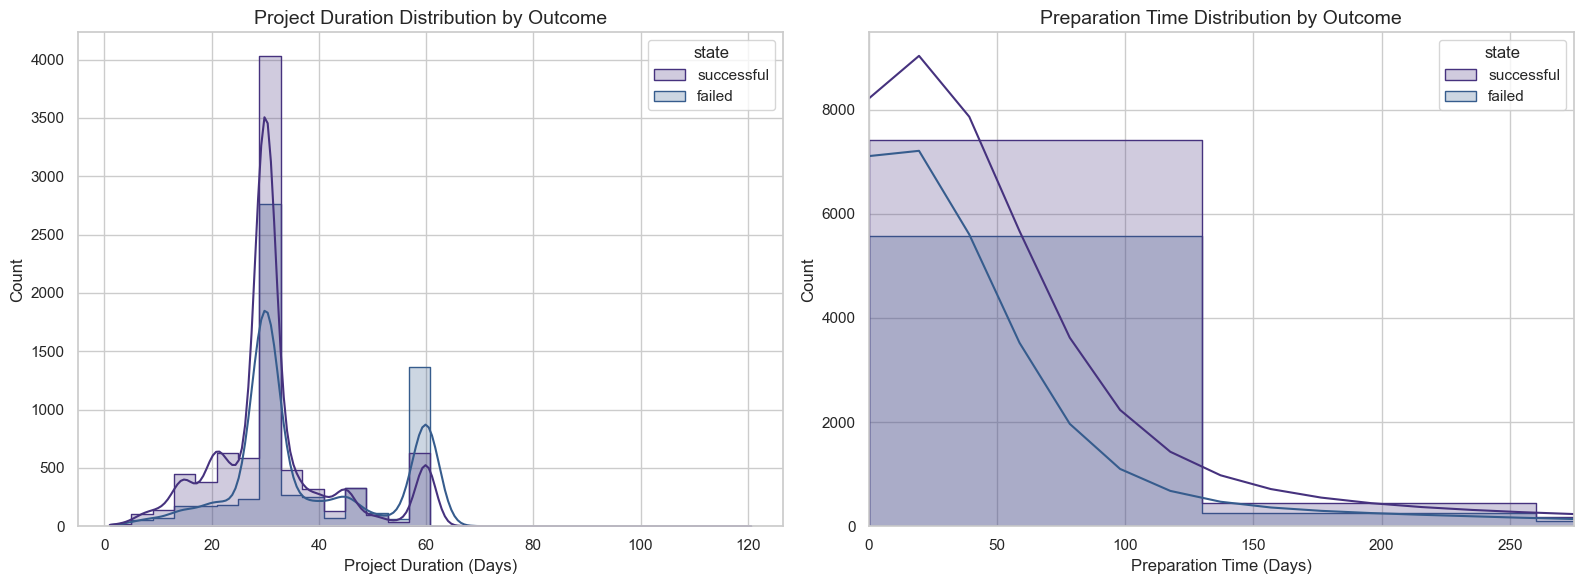

In [8]:
# --------------------------------------------------------
# 3. Feature Analysis - Available at Launch Time
# --------------------------------------------------------

print("\n=== FEATURE ANALYSIS (AVAILABLE AT LAUNCH) ===")

# Identify features available at launch time
launch_features = [
    'goal', 'country', 'currency', 'staff_pick', 'category', 'main_category',
    'name_len', 'name_len_clean', 'blurb_len', 'blurb_len_clean',
    'deadline_weekday', 'deadline_month', 'deadline_day', 'deadline_yr', 'deadline_hr',
    'launched_at_weekday', 'launched_at_month', 'launched_at_day', 'launched_at_yr', 'launched_at_hr',
    'video', 'show_feature_image'
]

post_launch_features = [
    'pledged', 'backers_count', 'usd_pledged', 'state_changed_at', 'state_changed_at_weekday',
    'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr', 'state_changed_at_hr',
    'spotlight'
]

print(f"Number of features available at launch time: {len(launch_features)}")
print(f"Number of post-launch features (cannot be used for prediction): {len(post_launch_features)}")

# Calculate time features
def parse_datetime(dt_str):
    try:
        return pd.to_datetime(dt_str)
    except:
        return None

# Project duration (available at launch)
df['created_at_datetime'] = df['created_at'].apply(parse_datetime)
df['launched_at_datetime'] = df['launched_at'].apply(parse_datetime)
df['deadline_datetime'] = df['deadline'].apply(parse_datetime)

# Calculate project duration (days)
df['project_duration'] = (df['deadline_datetime'] - df['launched_at_datetime']).dt.total_seconds() / (60*60*24)
print("\nProject Duration Statistics (Days):")
print(df['project_duration'].describe().round(2))

# Calculate preparation time (days from creation to launch)
df['preparation_time'] = (df['launched_at_datetime'] - df['created_at_datetime']).dt.total_seconds() / (60*60*24)
print("\nPreparation Time Statistics (Days):")
print(df['preparation_time'].describe().round(2))

# Visualize time-related features
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot project duration distribution by outcome
sns.histplot(data=df, x='project_duration', hue='state', bins=30, 
             kde=True, element="step", ax=axes[0])
axes[0].set_title('Project Duration Distribution by Outcome', fontsize=14)
axes[0].set_xlabel('Project Duration (Days)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Plot preparation time distribution by outcome
sns.histplot(data=df, x='preparation_time', hue='state', bins=30, 
             kde=True, element="step", ax=axes[1])
axes[1].set_title('Preparation Time Distribution by Outcome', fontsize=14)
axes[1].set_xlabel('Preparation Time (Days)', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
# Set x-axis limit for better visualization of preparation time
axes[1].set_xlim(0, min(df['preparation_time'].quantile(0.95), 365))  # Cap at 1 year or 95th percentile

plt.tight_layout()
plt.show()


=== CATEGORICAL FEATURE ANALYSIS ===

Project counts by main category:
main_category
Film & Video    2039
Publishing      1706
Music           1606
Art             1469
Food            1457
Fashion         1270
Technology      1157
Games            811
Crafts           700
Photography      652
Name: count, dtype: int64

Success rates by main category:
               success_rate  total_projects
main_category                              
Comics             0.921986             141
Dance              0.911765             102
Publishing         0.735053            1706
Fashion            0.698425            1270
Music              0.681818            1606
Games              0.643650             811
Photography        0.641104             652
Film & Video       0.601766            2039
Art                0.554118            1469
Theater            0.513369             187
Crafts             0.492857             700
Design             0.442623             488
Technology         0.369058  

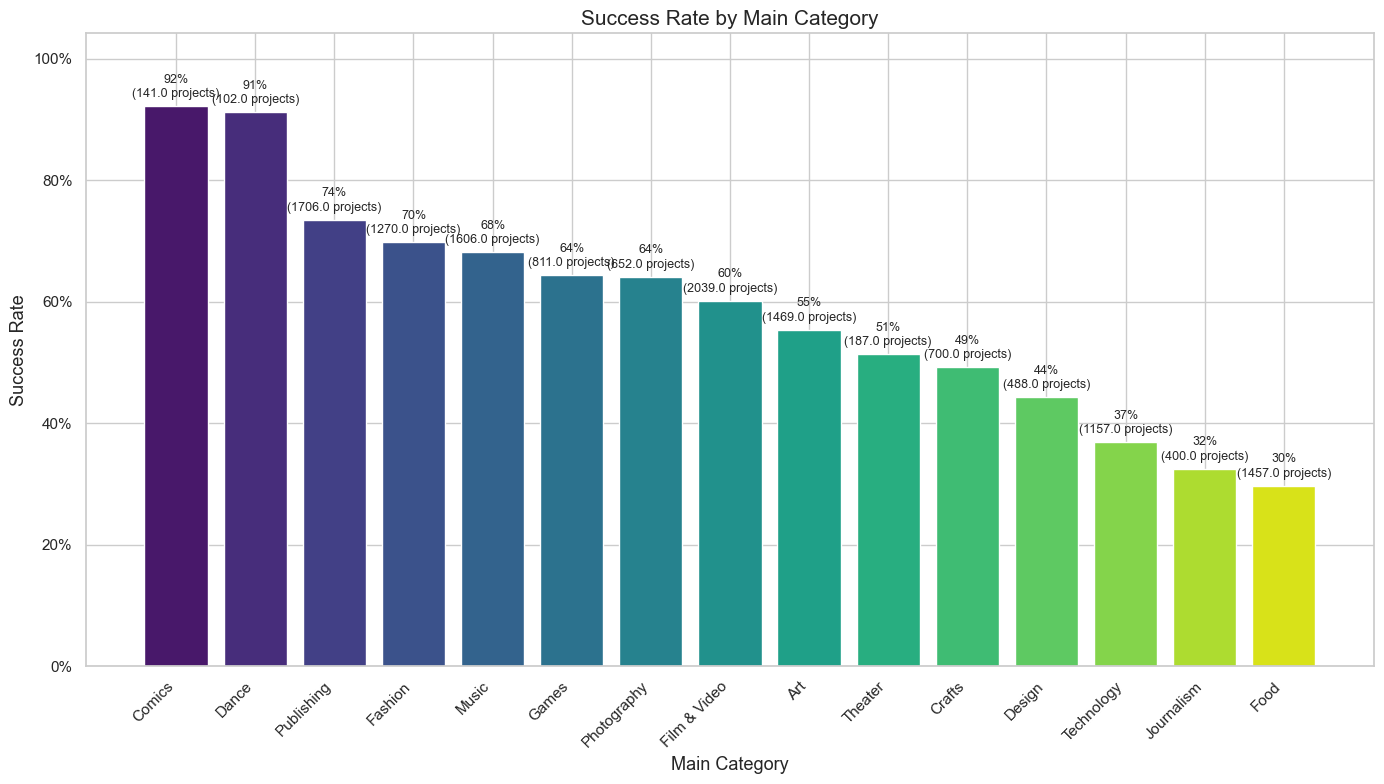


Success rates by top countries:
         success_rate  total_projects
country                              
HK           0.734177             158
GB           0.645197            1801
CA           0.621277             705
AU           0.614925             335
FR           0.594937             316
US           0.580913            8435
DE           0.504298             349
ES           0.452206             272
MX           0.441242             451
IT           0.300000             280


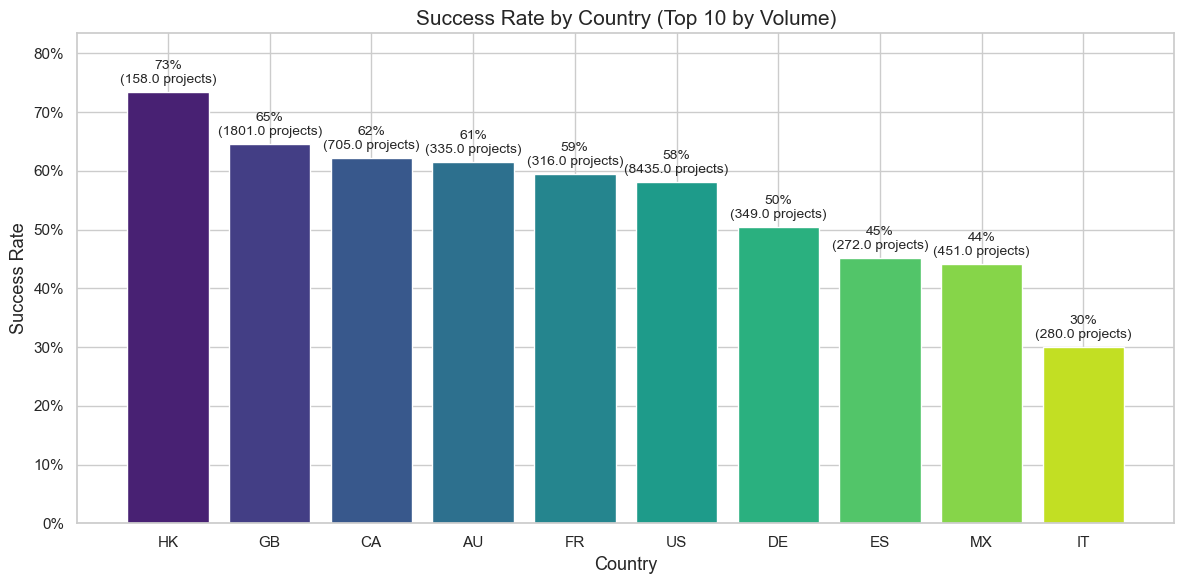

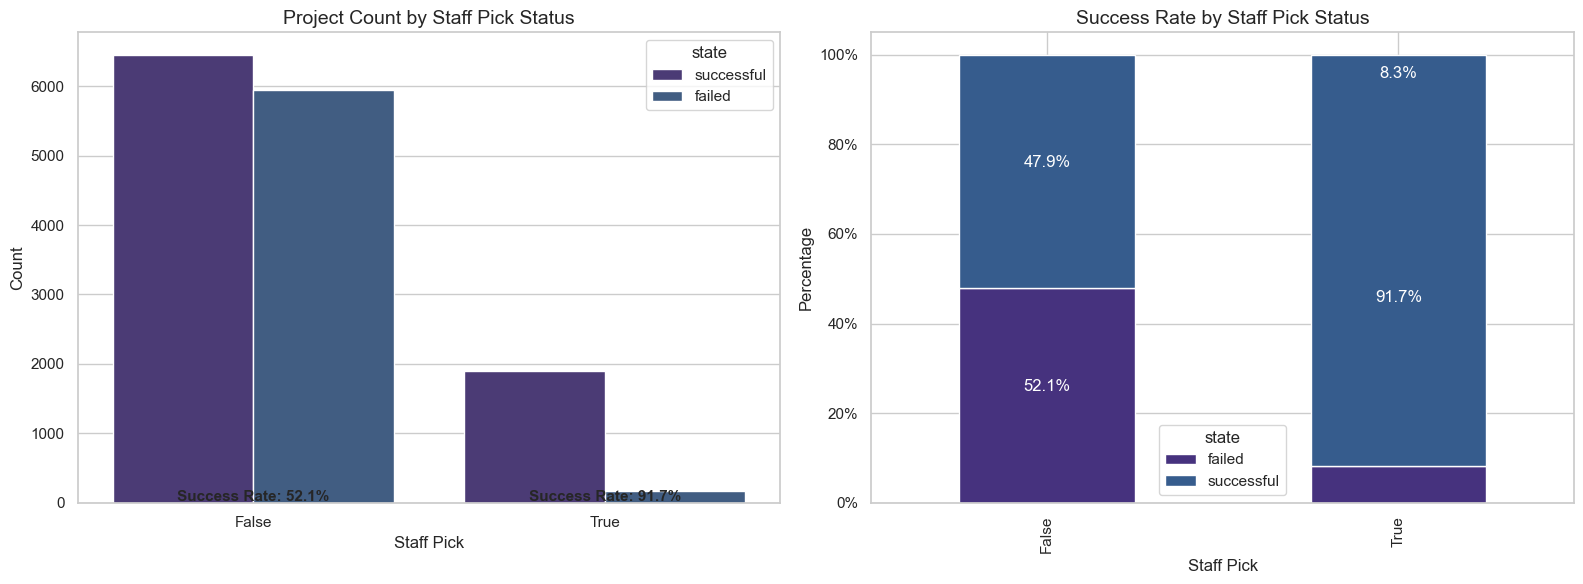

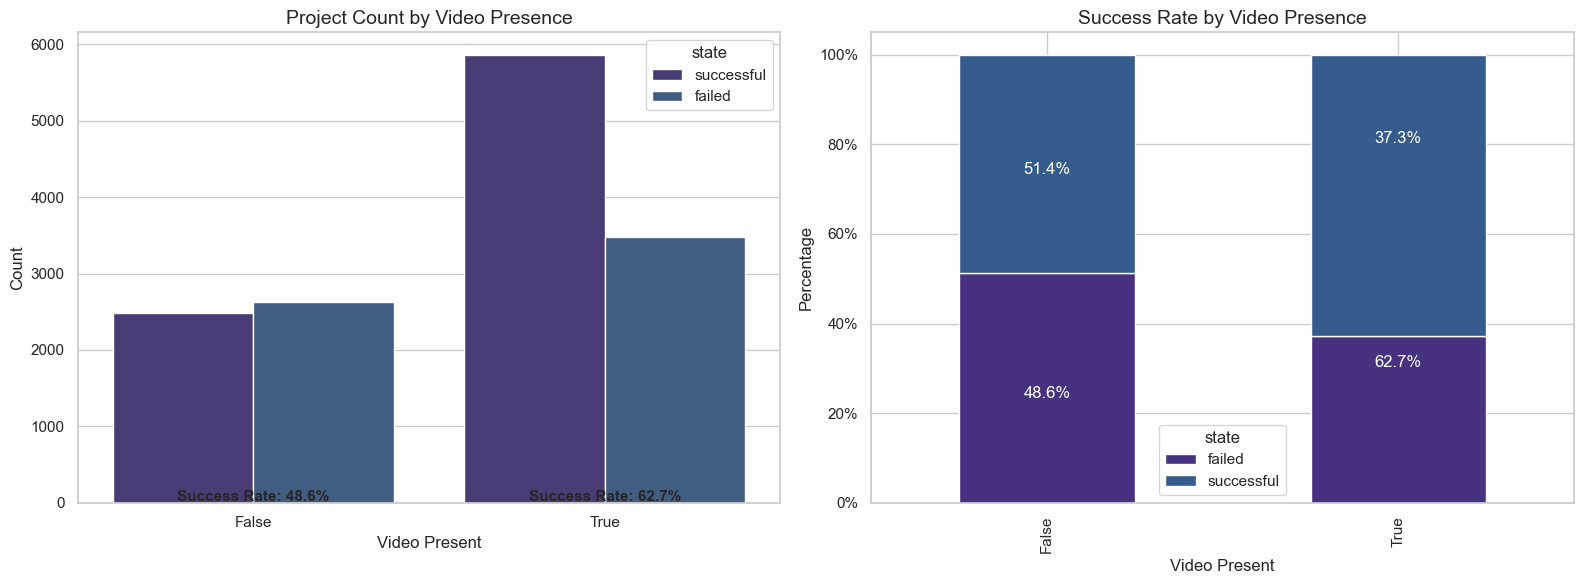

In [9]:
# --------------------------------------------------------
# 4. Advanced Categorical Feature Analysis
# --------------------------------------------------------

print("\n=== CATEGORICAL FEATURE ANALYSIS ===")

# Main Category Analysis
print("\nProject counts by main category:")
main_cat_counts = df['main_category'].value_counts()
print(main_cat_counts.head(10))

# Calculate success rates and sample sizes by main category
main_cat_analysis = df.groupby('main_category').agg(
    success_rate=('state', lambda x: (x == 'successful').mean()),
    total_projects=('state', 'count')
).sort_values('success_rate', ascending=False)

print("\nSuccess rates by main category:")
print(main_cat_analysis)

# Plot success rates by main category with sample size
plt.figure(figsize=(14, 8))
bars = plt.bar(main_cat_analysis.index, main_cat_analysis['success_rate'], 
               color=sns.color_palette("viridis", len(main_cat_analysis)))

# Add data labels and count information
for i, (idx, row) in enumerate(main_cat_analysis.iterrows()):
    plt.text(i, row['success_rate'] + 0.01, 
             f"{row['success_rate']:.0%}\n({row['total_projects']} projects)", 
             ha='center', va='bottom', fontsize=9, rotation=0)

plt.title('Success Rate by Main Category', fontsize=15)
plt.ylabel('Success Rate', fontsize=13)
plt.xlabel('Main Category', fontsize=13)
plt.ylim(0, main_cat_analysis['success_rate'].max() + 0.12)  # Add space for labels
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.tight_layout()
plt.show()

# Country Analysis
# Get top 10 countries by project count
top_countries = df['country'].value_counts().head(10).index
country_df = df[df['country'].isin(top_countries)]

# Calculate success rates for top countries
country_analysis = country_df.groupby('country').agg(
    success_rate=('state', lambda x: (x == 'successful').mean()),
    total_projects=('state', 'count')
).sort_values('success_rate', ascending=False)

print("\nSuccess rates by top countries:")
print(country_analysis)

# Plot success rates by country
plt.figure(figsize=(12, 6))
bars = plt.bar(country_analysis.index, country_analysis['success_rate'], 
               color=sns.color_palette("viridis", len(country_analysis)))

# Add data labels
for i, (idx, row) in enumerate(country_analysis.iterrows()):
    plt.text(i, row['success_rate'] + 0.01, 
             f"{row['success_rate']:.0%}\n({row['total_projects']} projects)", 
             ha='center', va='bottom', fontsize=10)

plt.title('Success Rate by Country (Top 10 by Volume)', fontsize=15)
plt.ylabel('Success Rate', fontsize=13)
plt.xlabel('Country', fontsize=13)
plt.ylim(0, country_analysis['success_rate'].max() + 0.1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.tight_layout()
plt.show()

# Staff pick analysis with visualization
staff_pick_counts = df.groupby(['staff_pick', 'state']).size().unstack()
staff_pick_pcts = staff_pick_counts.div(staff_pick_counts.sum(axis=1), axis=0)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Count plot
sns.countplot(x='staff_pick', hue='state', data=df, ax=axes[0])
axes[0].set_title('Project Count by Staff Pick Status', fontsize=14)
axes[0].set_xlabel('Staff Pick', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Add count and percentage on the first chart
for i, (staff_val, group) in enumerate(df.groupby('staff_pick')):
    staff_success_rate = (group['state'] == 'successful').mean()
    axes[0].text(i, 20, f"Success Rate: {staff_success_rate:.1%}", 
                ha='center', fontsize=11, fontweight='bold')

# Percentage plot
staff_pick_pcts.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Success Rate by Staff Pick Status', fontsize=14)
axes[1].set_xlabel('Staff Pick', fontsize=12)
axes[1].set_ylabel('Percentage', fontsize=12)
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Add percentage labels
for i, (idx, row) in enumerate(staff_pick_pcts.iterrows()):
    axes[1].text(i, row['successful'] / 2, f"{row['successful']:.1%}", 
                ha='center', va='center', fontsize=12, color='white')
    axes[1].text(i, row['successful'] + (row['failed'] / 2), f"{row['failed']:.1%}", 
                ha='center', va='center', fontsize=12, color='white')

plt.tight_layout()
plt.show()

# Video analysis with similar visualization
video_counts = df.groupby(['video', 'state']).size().unstack()
video_pcts = video_counts.div(video_counts.sum(axis=1), axis=0)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Count plot for video presence
sns.countplot(x='video', hue='state', data=df, ax=axes[0])
axes[0].set_title('Project Count by Video Presence', fontsize=14)
axes[0].set_xlabel('Video Present', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Add count and percentage on the first chart
for i, (video_val, group) in enumerate(df.groupby('video')):
    video_success_rate = (group['state'] == 'successful').mean()
    axes[0].text(i, 20, f"Success Rate: {video_success_rate:.1%}", 
                ha='center', fontsize=11, fontweight='bold')

# Percentage plot for video
video_pcts.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Success Rate by Video Presence', fontsize=14)
axes[1].set_xlabel('Video Present', fontsize=12)
axes[1].set_ylabel('Percentage', fontsize=12)
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Add percentage labels
for i, (idx, row) in enumerate(video_pcts.iterrows()):
    axes[1].text(i, row['successful'] / 2, f"{row['successful']:.1%}", 
                ha='center', va='center', fontsize=12, color='white')
    axes[1].text(i, row['successful'] + (row['failed'] / 2), f"{row['failed']:.1%}", 
                ha='center', va='center', fontsize=12, color='white')

plt.tight_layout()
plt.show()


=== NUMERIC FEATURE ANALYSIS ===

Goal amount statistics:
count    1.446300e+04
mean     6.917525e+04
std      1.601474e+06
min      1.000000e+00
25%      1.500000e+03
50%      5.000000e+03
75%      1.500000e+04
max      1.000000e+08
Name: goal, dtype: float64

Success rates by goal bins:
           success_rate  total_projects
goal_bins                              
<1K            0.729849            3176
1K-5K          0.637028            4240
5K-10K         0.573991            2453
10K-20K        0.534300            1793
20K-50K        0.415432            1620
50K-100K       0.297030             606
>100K          0.196522             575


/var/folders/p4/78tsv97n1x17vnr6ql85fmqh0000gn/T/ipykernel_27740/4226882461.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_analysis = df.groupby('goal_bins').agg(


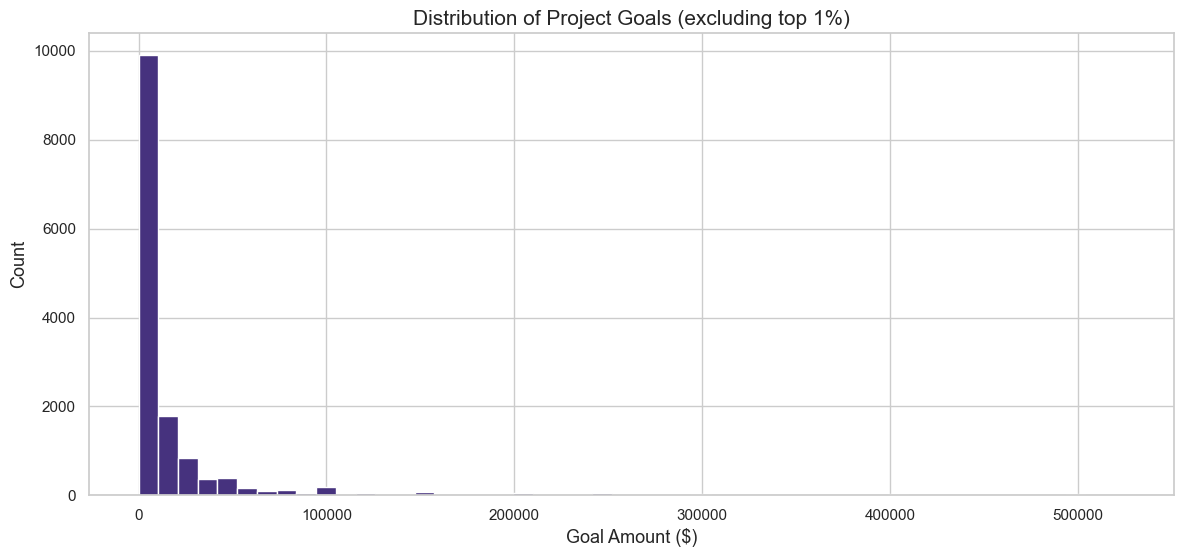

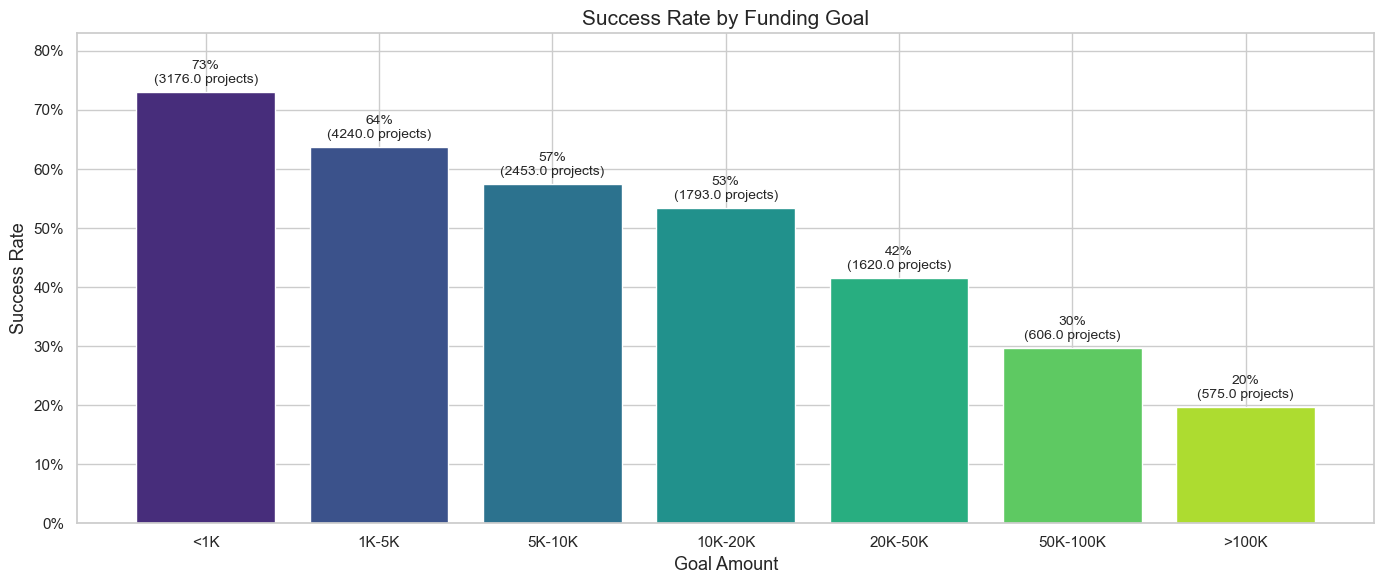

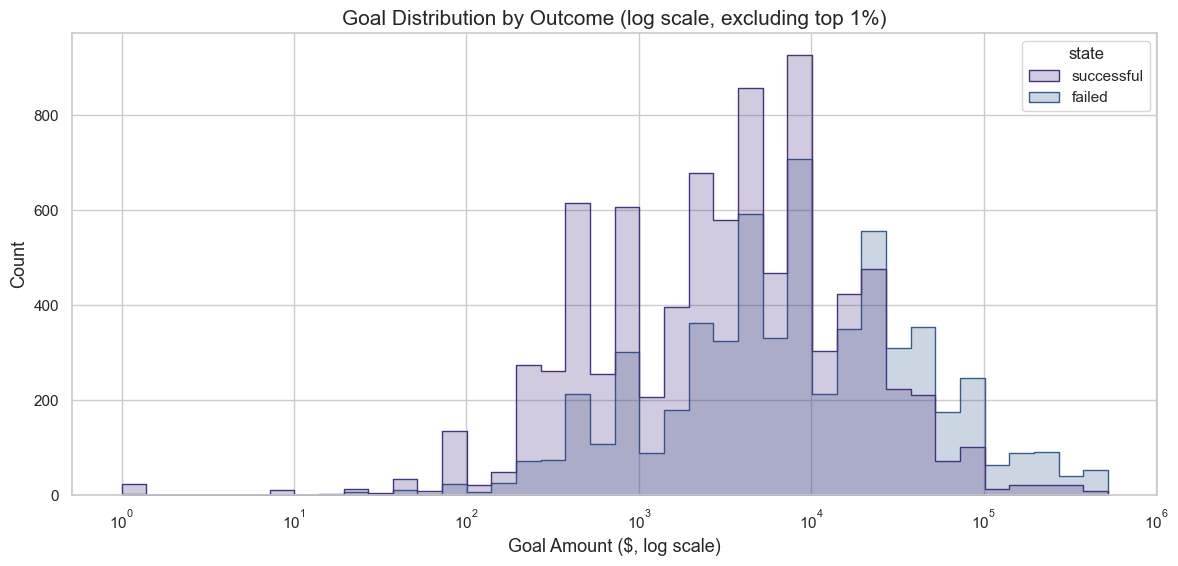

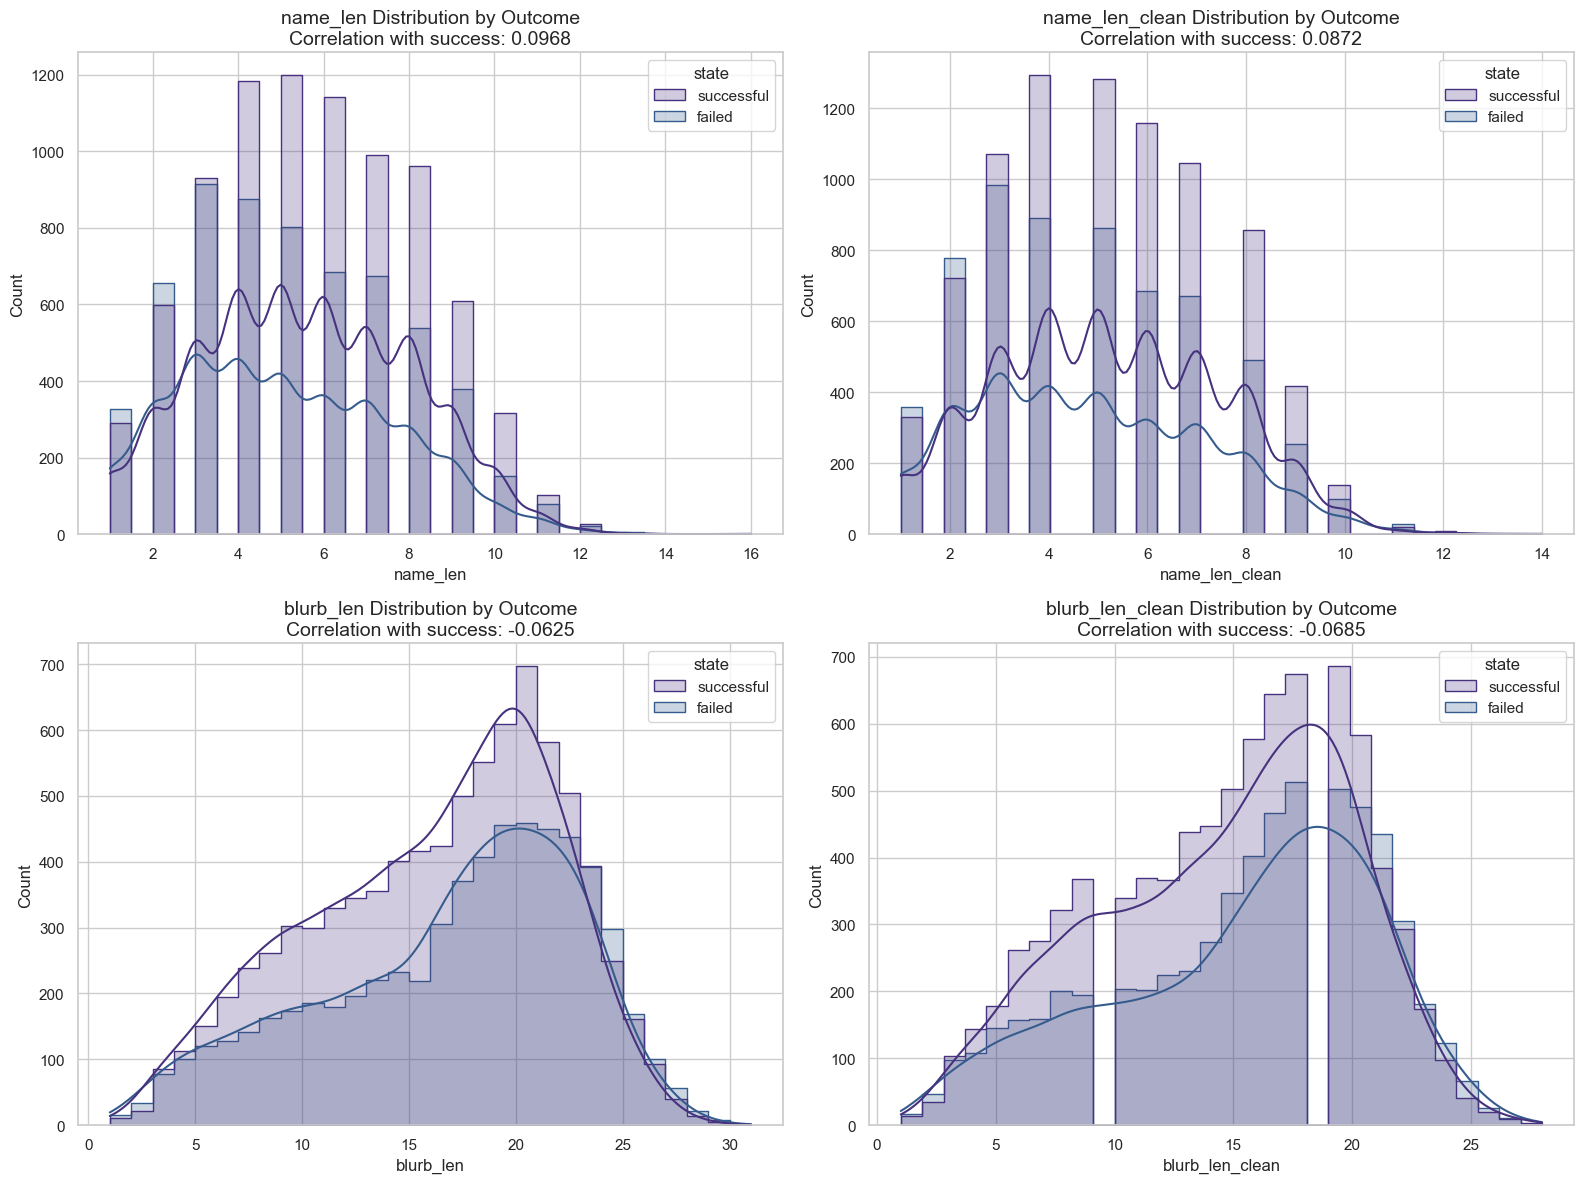


Correlations between text features and success:
name_len: 0.0968
name_len_clean: 0.0872
blurb_len_clean: -0.0685
blurb_len: -0.0625


In [10]:
# --------------------------------------------------------
# 5. Numeric Feature Analysis
# --------------------------------------------------------

print("\n=== NUMERIC FEATURE ANALYSIS ===")

# Goal amount analysis
print("\nGoal amount statistics:")
print(df['goal'].describe())

# Create goal bins for analysis
goal_bins = [0, 1000, 5000, 10000, 20000, 50000, 100000, float('inf')]
goal_labels = ['<1K', '1K-5K', '5K-10K', '10K-20K', '20K-50K', '50K-100K', '>100K']
df['goal_bins'] = pd.cut(df['goal'], bins=goal_bins, labels=goal_labels)

# Calculate success rates and counts by goal bins
goal_analysis = df.groupby('goal_bins').agg(
    success_rate=('state', lambda x: (x == 'successful').mean()),
    total_projects=('state', 'count')
).sort_values('success_rate', ascending=False)

print("\nSuccess rates by goal bins:")
print(goal_analysis)

# Plot distribution of goals with log scale
plt.figure(figsize=(14, 6))
plt.hist(df[df['goal'] < df['goal'].quantile(0.99)]['goal'], bins=50)
plt.title('Distribution of Project Goals (excluding top 1%)', fontsize=15)
plt.xlabel('Goal Amount ($)', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

# Plot success rates by goal bins
plt.figure(figsize=(14, 6))
bars = plt.bar(goal_analysis.index, goal_analysis['success_rate'], 
               color=sns.color_palette("viridis", len(goal_analysis)))

# Add data labels
for i, (idx, row) in enumerate(goal_analysis.iterrows()):
    plt.text(i, row['success_rate'] + 0.01, 
             f"{row['success_rate']:.0%}\n({row['total_projects']} projects)", 
             ha='center', va='bottom', fontsize=10)

plt.title('Success Rate by Funding Goal', fontsize=15)
plt.ylabel('Success Rate', fontsize=13)
plt.xlabel('Goal Amount', fontsize=13)
plt.ylim(0, goal_analysis['success_rate'].max() + 0.1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.tight_layout()
plt.show()

# Goal distribution by outcome
plt.figure(figsize=(14, 6))
# Apply log transformation for better visualization
sns.histplot(data=df[df['goal'] < df['goal'].quantile(0.99)], 
             x='goal', hue='state', bins=40, 
             element="step", log_scale=True)
plt.title('Goal Distribution by Outcome (log scale, excluding top 1%)', fontsize=15)
plt.xlabel('Goal Amount ($, log scale)', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

# Name and blurb length analysis with visualization
text_features = ['name_len', 'name_len_clean', 'blurb_len', 'blurb_len_clean']
text_corr = []

plt.figure(figsize=(16, 12))
for i, feature in enumerate(text_features):
    plt.subplot(2, 2, i+1)
    
    # Calculate correlation with success
    success_correlation = df[feature].corr(df['state'].map({'successful': 1, 'failed': 0}))
    text_corr.append((feature, success_correlation))
    
    # Plot
    sns.histplot(data=df, x=feature, hue='state', bins=30, 
                 kde=True, element="step")
    plt.title(f'{feature} Distribution by Outcome\nCorrelation with success: {success_correlation:.4f}', 
              fontsize=14)
    plt.xlabel(f'{feature}', fontsize=12)
    plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

# Print correlations
print("\nCorrelations between text features and success:")
for feature, corr in sorted(text_corr, key=lambda x: abs(x[1]), reverse=True):
    print(f"{feature}: {corr:.4f}")


=== TEMPORAL ANALYSIS ===


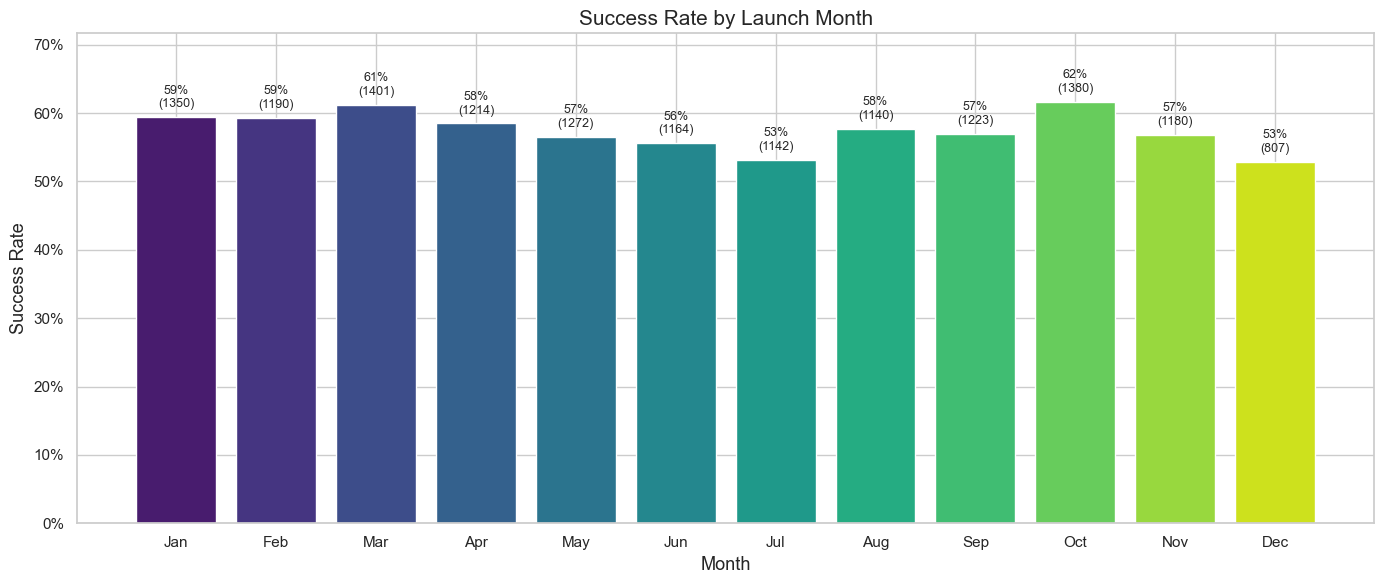

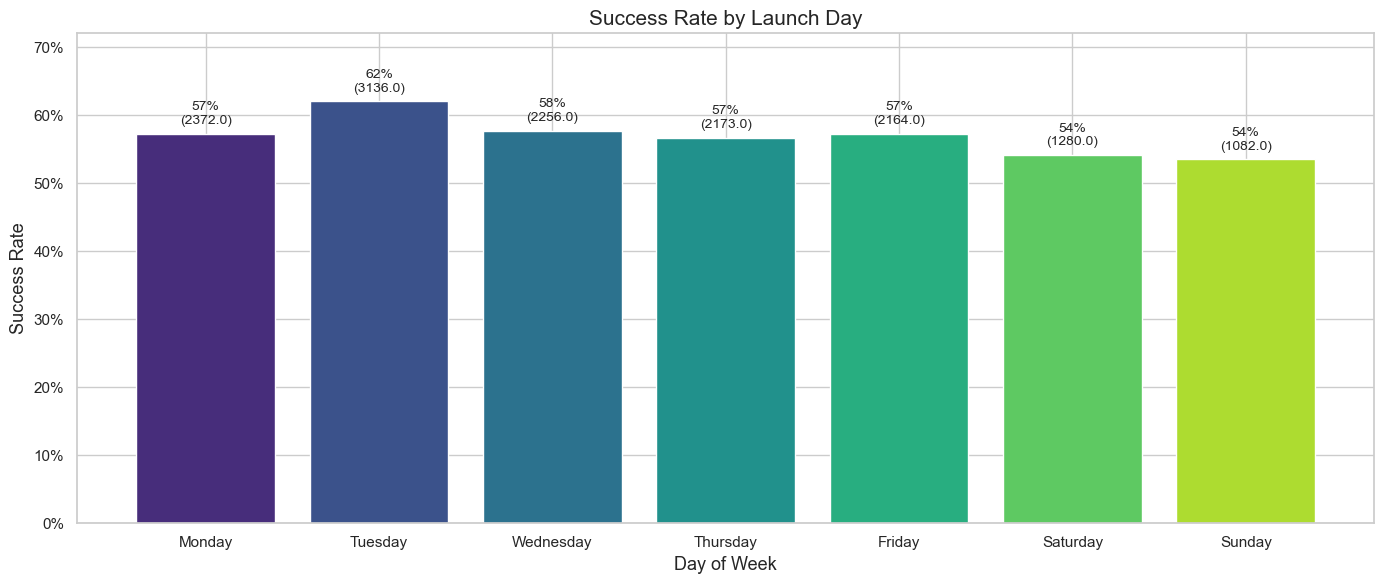

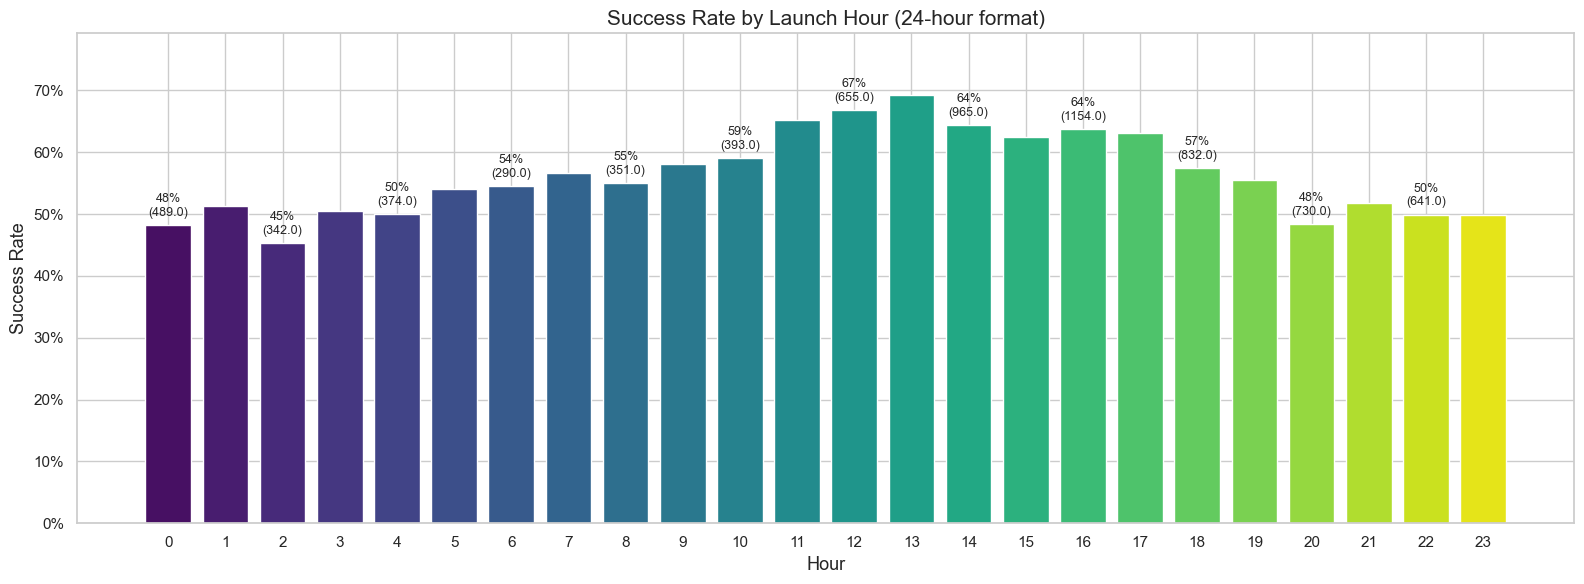

/var/folders/p4/78tsv97n1x17vnr6ql85fmqh0000gn/T/ipykernel_27740/2970592610.py:97: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_analysis = df.groupby('duration_bins').agg(


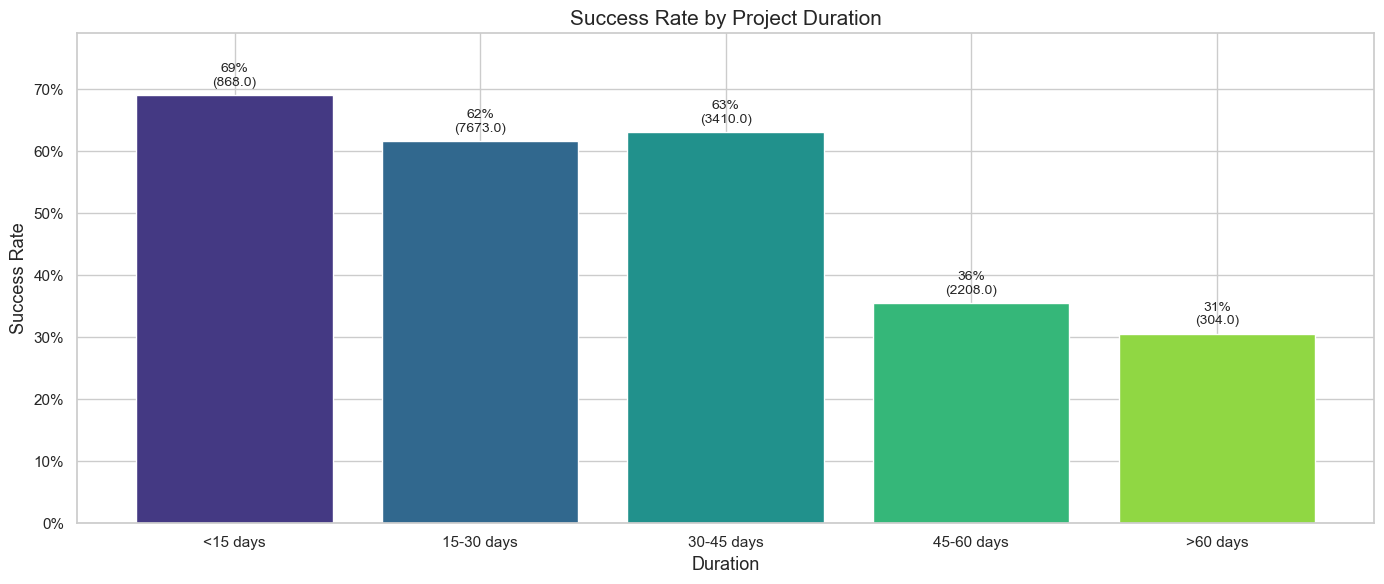

In [11]:
# --------------------------------------------------------
# 6. Enhanced Temporal Analysis
# --------------------------------------------------------

print("\n=== TEMPORAL ANALYSIS ===")

# Create a monthly success rate visualization
monthly_data = df.groupby('launched_at_month').agg(
    success_rate=('state', lambda x: (x == 'successful').mean()),
    total_projects=('state', 'count')
)

# Create month names for better visualization
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_data = monthly_data.reset_index()
monthly_data['month_name'] = monthly_data['launched_at_month'].apply(lambda x: month_names[x-1])
monthly_data = monthly_data.sort_values('launched_at_month')

plt.figure(figsize=(14, 6))
bars = plt.bar(monthly_data['month_name'], monthly_data['success_rate'], 
               color=sns.color_palette("viridis", 12))

# Add data labels
for i, row in monthly_data.iterrows():
    plt.text(i, row['success_rate'] + 0.01, 
             f"{row['success_rate']:.0%}\n({row['total_projects']})", 
             ha='center', va='bottom', fontsize=9)

plt.title('Success Rate by Launch Month', fontsize=15)
plt.ylabel('Success Rate', fontsize=13)
plt.xlabel('Month', fontsize=13)
plt.ylim(0, monthly_data['success_rate'].max() + 0.1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.tight_layout()
plt.show()

# Day of week analysis with proper ordering
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_data = df.groupby('launched_at_weekday').agg(
    success_rate=('state', lambda x: (x == 'successful').mean()),
    total_projects=('state', 'count')
)

# Reorder by day of week
weekday_data = weekday_data.reindex(weekday_order)

plt.figure(figsize=(14, 6))
bars = plt.bar(weekday_data.index, weekday_data['success_rate'], 
               color=sns.color_palette("viridis", 7))

# Add data labels
for i, (idx, row) in enumerate(weekday_data.iterrows()):
    plt.text(i, row['success_rate'] + 0.01, 
             f"{row['success_rate']:.0%}\n({row['total_projects']})", 
             ha='center', va='bottom', fontsize=10)

plt.title('Success Rate by Launch Day', fontsize=15)
plt.ylabel('Success Rate', fontsize=13)
plt.xlabel('Day of Week', fontsize=13)
plt.ylim(0, weekday_data['success_rate'].max() + 0.1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.tight_layout()
plt.show()

# Hour of day analysis
hourly_data = df.groupby('launched_at_hr').agg(
    success_rate=('state', lambda x: (x == 'successful').mean()),
    total_projects=('state', 'count')
)

plt.figure(figsize=(16, 6))
bars = plt.bar(hourly_data.index, hourly_data['success_rate'], 
               color=sns.color_palette("viridis", 24))

# Add data labels
for i, (idx, row) in enumerate(hourly_data.iterrows()):
    if i % 2 == 0:  # Show labels for even hours to avoid overcrowding
        plt.text(i, row['success_rate'] + 0.01, 
                f"{row['success_rate']:.0%}\n({row['total_projects']})", 
                ha='center', va='bottom', fontsize=9)

plt.title('Success Rate by Launch Hour (24-hour format)', fontsize=15)
plt.ylabel('Success Rate', fontsize=13)
plt.xlabel('Hour', fontsize=13)
plt.xticks(range(0, 24))
plt.ylim(0, hourly_data['success_rate'].max() + 0.1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.tight_layout()
plt.show()

# Project duration analysis
duration_bins = [0, 15, 30, 45, 60, float('inf')]
duration_labels = ['<15 days', '15-30 days', '30-45 days', '45-60 days', '>60 days']
df['duration_bins'] = pd.cut(df['project_duration'], bins=duration_bins, labels=duration_labels)

duration_analysis = df.groupby('duration_bins').agg(
    success_rate=('state', lambda x: (x == 'successful').mean()),
    total_projects=('state', 'count')
)

plt.figure(figsize=(14, 6))
bars = plt.bar(duration_analysis.index, duration_analysis['success_rate'], 
               color=sns.color_palette("viridis", len(duration_analysis)))

# Add data labels
for i, (idx, row) in enumerate(duration_analysis.iterrows()):
    plt.text(i, row['success_rate'] + 0.01, 
             f"{row['success_rate']:.0%}\n({row['total_projects']})", 
             ha='center', va='bottom', fontsize=10)

plt.title('Success Rate by Project Duration', fontsize=15)
plt.ylabel('Success Rate', fontsize=13)
plt.xlabel('Duration', fontsize=13)
plt.ylim(0, duration_analysis['success_rate'].max() + 0.1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.tight_layout()
plt.show()


=== ENHANCED FEATURE IMPORTANCE ===

Correlation of numeric features with success:
success             1.000000
name_len            0.096805
name_len_clean      0.087207
preparation_time    0.038708
goal               -0.028245
blurb_len          -0.062485
blurb_len_clean    -0.068499
project_duration   -0.230113
Name: success, dtype: float64


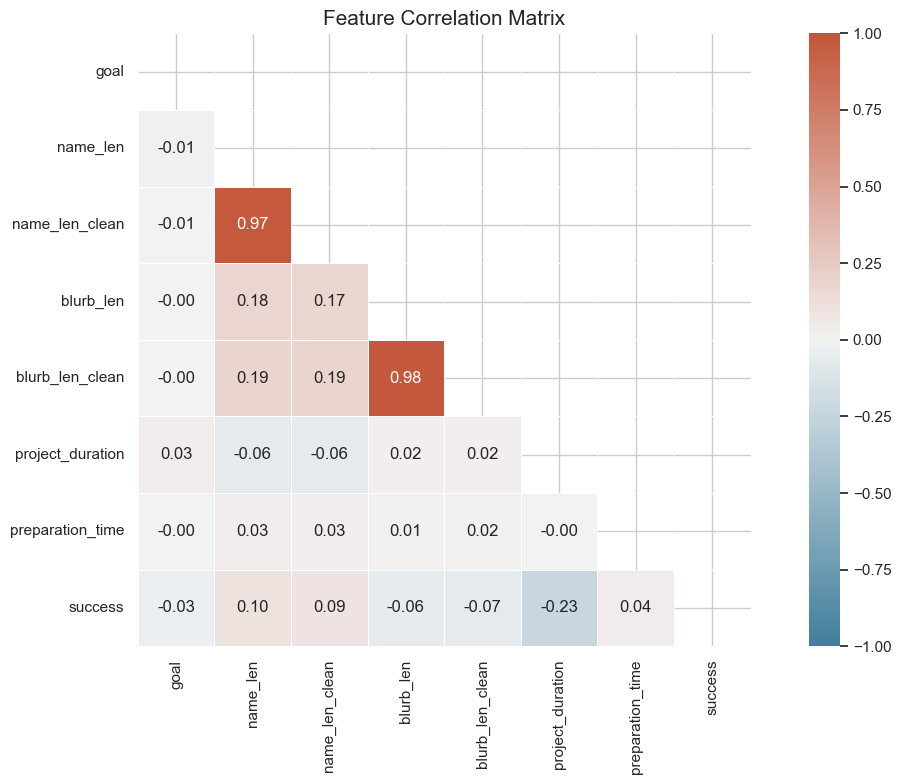

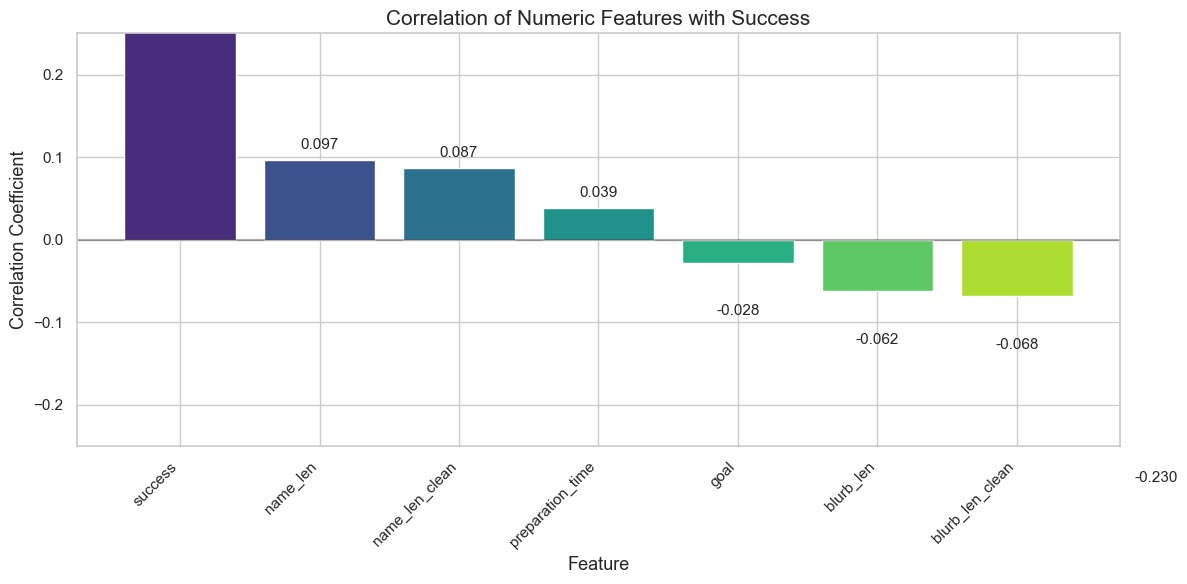

In [12]:
# --------------------------------------------------------
# 7. Enhanced Feature Importance Analysis
# --------------------------------------------------------

print("\n=== ENHANCED FEATURE IMPORTANCE ===")

# Calculate correlation for numeric features
numeric_features = ['goal', 'name_len', 'name_len_clean', 'blurb_len', 'blurb_len_clean', 
                   'project_duration', 'preparation_time']
numeric_df = df[numeric_features].copy()
numeric_df['success'] = df['state'].map({'successful': 1, 'failed': 0})

# Calculate correlation matrix
correlation = numeric_df.corr()['success'].sort_values(ascending=False)
print("\nCorrelation of numeric features with success:")
print(correlation)

# Visualize feature correlations
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            annot=True, fmt='.2f', square=True, linewidths=.5)
plt.title('Feature Correlation Matrix', fontsize=15)
plt.tight_layout()
plt.show()

# Feature importance visualization
plt.figure(figsize=(12, 6))
bars = plt.bar(correlation.index[:-1], correlation.values[:-1], 
               color=sns.color_palette("viridis", len(correlation)-1))

# Add data labels
for i, (feature, corr) in enumerate(correlation.items()):
    if feature != 'success':
        plt.text(i, corr + (0.01 if corr >= 0 else -0.05), 
                f"{corr:.3f}", 
                ha='center', va='bottom' if corr >= 0 else 'top', 
                fontsize=11)

plt.title('Correlation of Numeric Features with Success', fontsize=15)
plt.ylabel('Correlation Coefficient', fontsize=13)
plt.xlabel('Feature', fontsize=13)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.ylim(-0.25, 0.25)
plt.tight_layout()
plt.show()


=== BIVARIATE ANALYSIS ===


/var/folders/p4/78tsv97n1x17vnr6ql85fmqh0000gn/T/ipykernel_27740/1676322884.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_success = df.groupby('goal_bins_fine')['state'].apply(lambda x: (x == 'successful').mean())


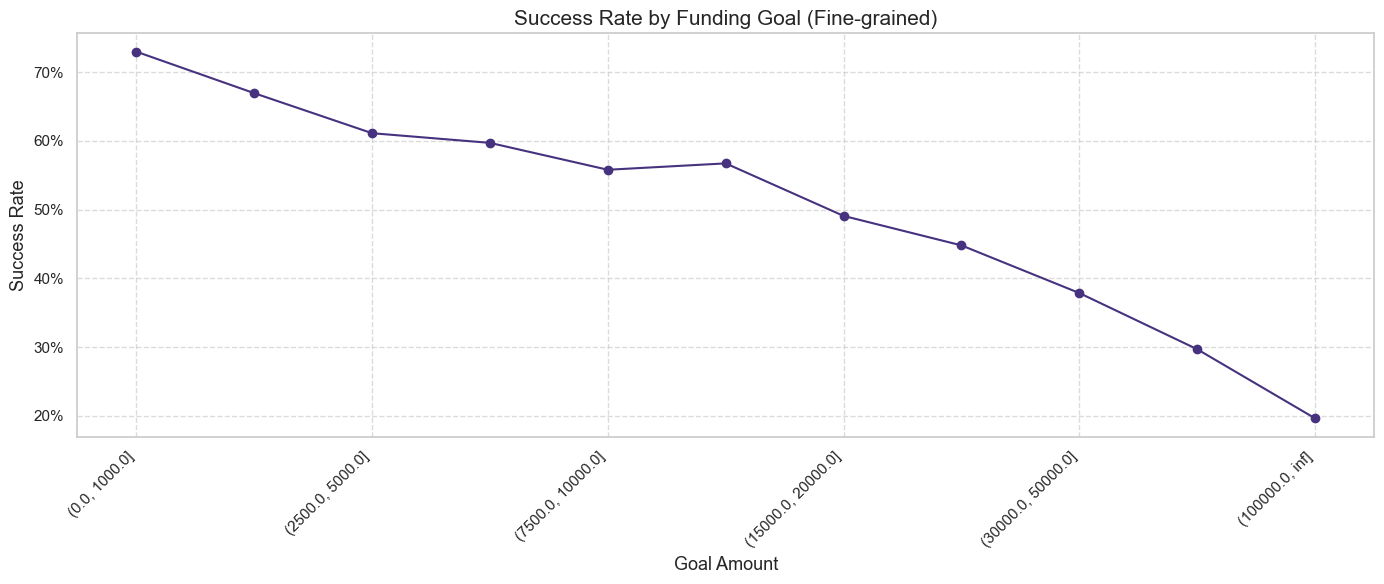

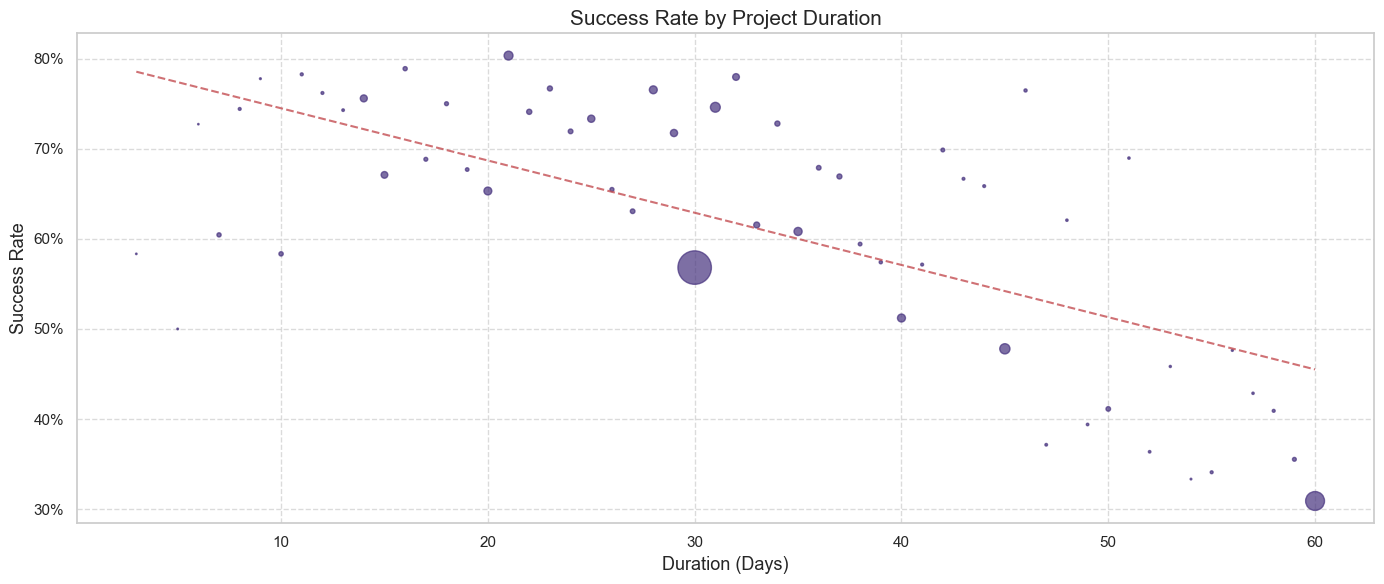

In [13]:
# --------------------------------------------------------
# 8. Bivariate Analysis for Key Features
# --------------------------------------------------------

print("\n=== BIVARIATE ANALYSIS ===")

# Goal vs. Success Rate (binned analysis)
goal_bins_fine = [0, 1000, 2500, 5000, 7500, 10000, 15000, 20000, 30000, 50000, 100000, float('inf')]
goal_labels_fine = [f"{bins[0]}-{bins[1]}" for bins in zip(goal_bins_fine[:-1], goal_bins_fine[1:])]
goal_labels_fine[-1] = f">{goal_bins_fine[-2]}"

df['goal_bins_fine'] = pd.cut(df['goal'], bins=goal_bins_fine)
goal_success = df.groupby('goal_bins_fine')['state'].apply(lambda x: (x == 'successful').mean())

plt.figure(figsize=(14, 6))
goal_success.plot(kind='line', marker='o')
plt.title('Success Rate by Funding Goal (Fine-grained)', fontsize=15)
plt.ylabel('Success Rate', fontsize=13)
plt.xlabel('Goal Amount', fontsize=13)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Duration vs. Success Rate (scatter plot with trend)
# Group by duration rounded to nearest day
df['duration_rounded'] = df['project_duration'].round().astype(int)
duration_success = df.groupby('duration_rounded')['state'].apply(lambda x: (x == 'successful').mean())
duration_counts = df.groupby('duration_rounded').size()

# Filter for durations with enough samples
min_samples = 10
duration_success = duration_success[duration_counts >= min_samples]
duration_counts = duration_counts[duration_counts >= min_samples]

plt.figure(figsize=(14, 6))
plt.scatter(duration_success.index, duration_success.values, 
            s=duration_counts.values / 10, alpha=0.7)

# Add trend line
z = np.polyfit(duration_success.index, duration_success.values, 1)
p = np.poly1d(z)
plt.plot(duration_success.index, p(duration_success.index), "r--", alpha=0.8)

plt.title('Success Rate by Project Duration', fontsize=15)
plt.ylabel('Success Rate', fontsize=13)
plt.xlabel('Duration (Days)', fontsize=13)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [14]:
# --------------------------------------------------------
# 9. Summary and Key Findings
# --------------------------------------------------------

print("\n=== SUMMARY OF KEY FINDINGS ===")
print("1. Dataset contains", df.shape[0], "projects (successful or failed)")
print(f"2. Overall success rate: {(target_counts['successful'] / df.shape[0] * 100):.2f}%")

# Calculate top positive predictors
positive_predictors = []

# Check staff pick impact
staff_pick_impact = df.groupby('staff_pick')['state'].apply(lambda x: (x == 'successful').mean())
staff_diff = staff_pick_impact[True] - staff_pick_impact[False]
positive_predictors.append(("Staff Pick", staff_diff))

# Check video impact
video_impact = df.groupby('video')['state'].apply(lambda x: (x == 'successful').mean())
video_diff = video_impact[True] - video_impact[False]
positive_predictors.append(("Video", video_diff))

# Check goal impact (comparing <5K to >50K)
low_goal = df[df['goal'] < 5000]['state'].apply(lambda x: x == 'successful').mean()
high_goal = df[df['goal'] > 50000]['state'].apply(lambda x: x == 'successful').mean()
goal_diff = low_goal - high_goal
positive_predictors.append(("Low Goal (<5K vs >50K)", goal_diff))

# Check duration impact (comparing 30-45 days vs >60 days)
med_duration = df[(df['project_duration'] >= 30) & (df['project_duration'] <= 45)]['state'].apply(lambda x: x == 'successful').mean()
long_duration = df[df['project_duration'] > 60]['state'].apply(lambda x: x == 'successful').mean()
duration_diff = med_duration - long_duration
positive_predictors.append(("Medium Duration (30-45 days vs >60 days)", duration_diff))

# Sort and print top predictors
positive_predictors.sort(key=lambda x: x[1], reverse=True)
print("\nTop positive impact features (difference in success rate):")
for predictor, impact in positive_predictors:
    print(f"3. {predictor}: +{impact:.2%}")

# Print key categorical insights
print("\nCategory insights:")
print(f"4. Highest success rate categories: {', '.join(main_cat_analysis.head(3).index)}")
print(f"5. Lowest success rate categories: {', '.join(main_cat_analysis.tail(3).index)}")

# Print key temporal insights
print("\nTemporal insights:")
print(f"6. Best launch month: {monthly_data.loc[monthly_data['success_rate'].idxmax(), 'month_name']} ({monthly_data['success_rate'].max():.1%} success rate)")
print(f"7. Best launch day: {weekday_data['success_rate'].idxmax()} ({weekday_data['success_rate'].max():.1%} success rate)")

# Print optimal goal range
print("\nOptimal funding parameters:")
print(f"8. Optimal goal range: {goal_analysis.index[0]} ({goal_analysis['success_rate'].max():.1%} success rate)")
print(f"9. Optimal project duration: {duration_analysis['success_rate'].idxmax()} ({duration_analysis['success_rate'].max():.1%} success rate)")


=== SUMMARY OF KEY FINDINGS ===
1. Dataset contains 14463 projects (successful or failed)
2. Overall success rate: 57.74%

Top positive impact features (difference in success rate):
3. Low Goal (<5K vs >50K): +44.60%
3. Staff Pick: +39.66%
3. Medium Duration (30-45 days vs >60 days): +28.15%
3. Video: +14.09%

Category insights:
4. Highest success rate categories: Comics, Dance, Publishing
5. Lowest success rate categories: Technology, Journalism, Food

Temporal insights:
6. Best launch month: Oct (61.7% success rate)
7. Best launch day: Tuesday (62.1% success rate)

Optimal funding parameters:
8. Optimal goal range: <1K (73.0% success rate)
9. Optimal project duration: <15 days (69.0% success rate)



=== CROSS-FEATURE ANALYSIS ===


/var/folders/p4/78tsv97n1x17vnr6ql85fmqh0000gn/T/ipykernel_27740/342582544.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_goal.index, y=cat_goal.values, palette="viridis")


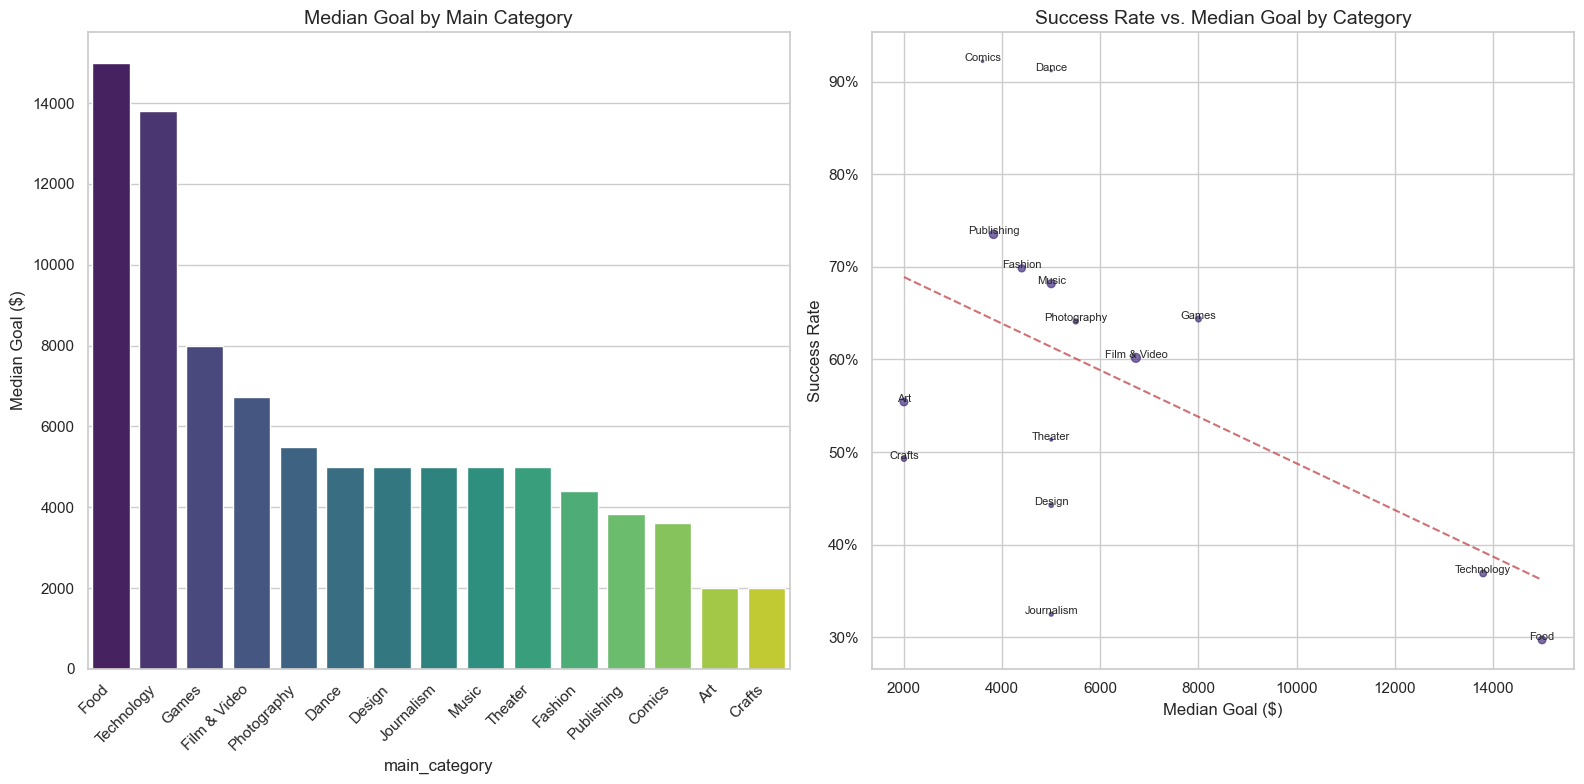

<Figure size 1800x1000 with 0 Axes>

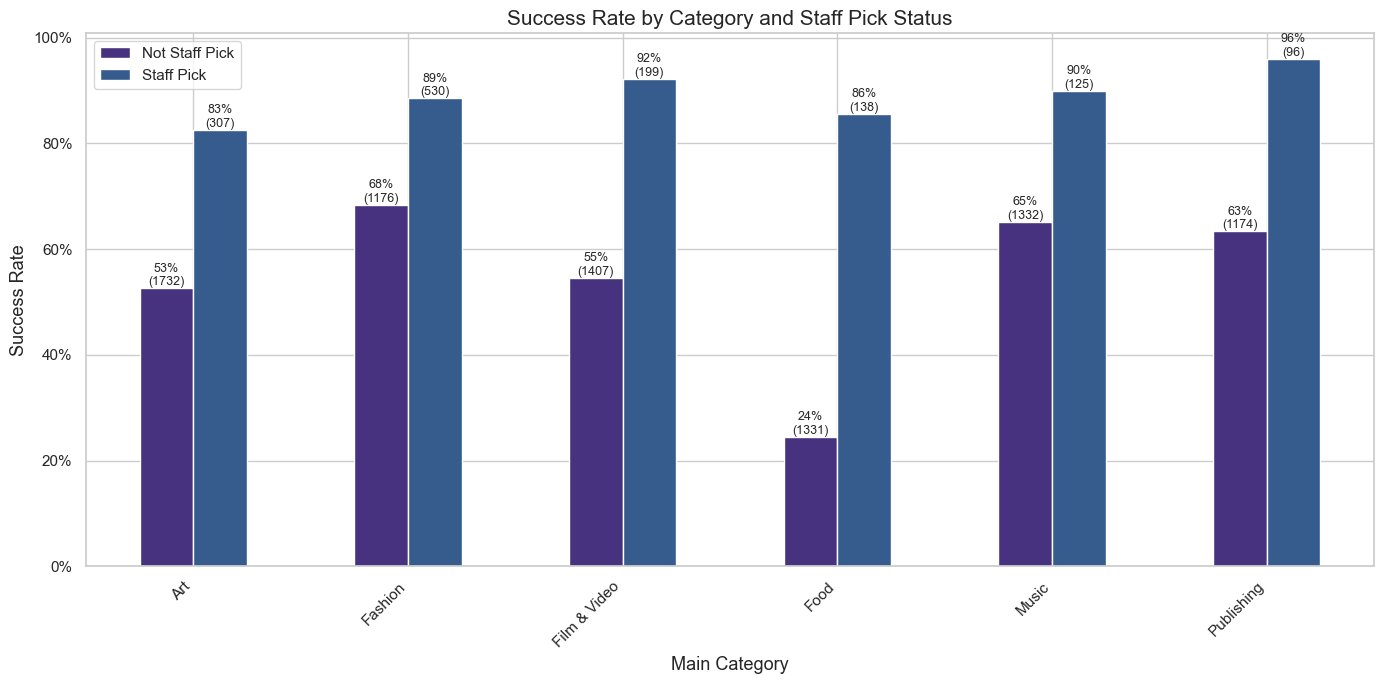

In [15]:
# --------------------------------------------------------
# 10. Cross-Feature Analysis
# --------------------------------------------------------

print("\n=== CROSS-FEATURE ANALYSIS ===")

# Goal by Category
plt.figure(figsize=(16, 8))
cat_goal = df.groupby('main_category')['goal'].median().sort_values(ascending=False)

# Plot median goals by category
plt.subplot(1, 2, 1)
sns.barplot(x=cat_goal.index, y=cat_goal.values, palette="viridis")
plt.title('Median Goal by Main Category', fontsize=14)
plt.ylabel('Median Goal ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Category success rate vs. median goal
plt.subplot(1, 2, 2)
category_data = pd.DataFrame({
    'success_rate': main_cat_analysis['success_rate'],
    'median_goal': df.groupby('main_category')['goal'].median(),
    'count': main_cat_analysis['total_projects']
})

plt.scatter(category_data['median_goal'], category_data['success_rate'], 
            s=category_data['count'] / 50, alpha=0.7)

# Add category labels
for i, (idx, row) in enumerate(category_data.iterrows()):
    plt.annotate(idx, (row['median_goal'], row['success_rate']), 
                 fontsize=8, ha='center')

# Add trend line
z = np.polyfit(category_data['median_goal'], category_data['success_rate'], 1)
p = np.poly1d(z)
x_range = np.linspace(category_data['median_goal'].min(), category_data['median_goal'].max(), 100)
plt.plot(x_range, p(x_range), "r--", alpha=0.8)

plt.title('Success Rate vs. Median Goal by Category', fontsize=14)
plt.xlabel('Median Goal ($)', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.tight_layout()
plt.show()

# Goal, Category, and Staff Pick Interaction
# Set up the figure for a complex analysis
plt.figure(figsize=(18, 10))

# Create a custom subset for analysis
top_categories = main_cat_counts.head(6).index
subset_df = df[df['main_category'].isin(top_categories)]

# Create a grouped bar chart for staff pick and category
staff_cat_data = subset_df.groupby(['main_category', 'staff_pick'])['state'].apply(
    lambda x: (x == 'successful').mean()).unstack()

ax = staff_cat_data.plot(kind='bar', figsize=(14, 7))
plt.title('Success Rate by Category and Staff Pick Status', fontsize=15)
plt.xlabel('Main Category', fontsize=13)
plt.ylabel('Success Rate', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.legend(['Not Staff Pick', 'Staff Pick'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Add data labels
for i, container in enumerate(ax.containers):
    is_staff_pick = i == 1  # Second container is for staff picks
    for j, val in enumerate(container):
        height = val.get_height()
        count = len(subset_df[(subset_df['main_category'] == top_categories[j]) & 
                              (subset_df['staff_pick'] == is_staff_pick)])
        ax.text(val.get_x() + val.get_width()/2, height,
                f'{height:.0%}\n({count})', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


=== ADVANCED GOAL ANALYSIS ===


/var/folders/p4/78tsv97n1x17vnr6ql85fmqh0000gn/T/ipykernel_27740/3628166381.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_success_detailed = df.groupby('goal_detailed').agg(


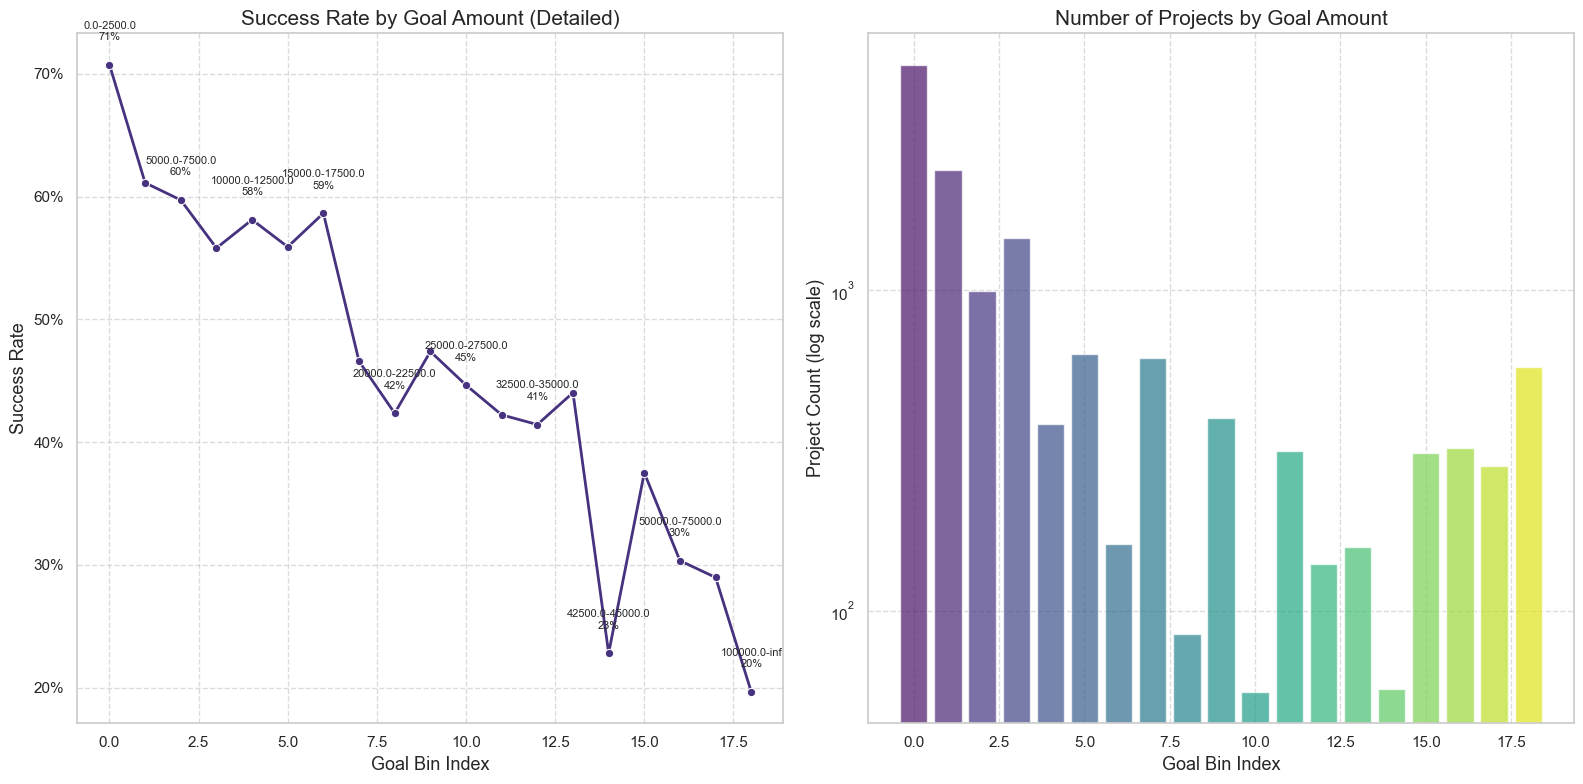

In [16]:
# --------------------------------------------------------
# 11. Advanced Goal Analysis
# --------------------------------------------------------

print("\n=== ADVANCED GOAL ANALYSIS ===")

# Create a detailed view of how success rate changes with goal amount
# Use much finer bins for precision
fine_goal_bins = list(range(0, 50001, 2500)) + [75000, 100000, float('inf')]
df['goal_detailed'] = pd.cut(df['goal'], bins=fine_goal_bins)

# Calculate success rate for each bin
goal_success_detailed = df.groupby('goal_detailed').agg(
    success_rate=('state', lambda x: (x == 'successful').mean()),
    project_count=('id', 'count')
)

# Filter bins with enough data points for reliability
min_projects = 50
goal_success_filtered = goal_success_detailed[goal_success_detailed['project_count'] >= min_projects]

# Plot the detailed relationship
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.lineplot(x=range(len(goal_success_filtered)), 
             y=goal_success_filtered['success_rate'],
             marker='o', linewidth=2)

# Add labels at key points
for i, (idx, row) in enumerate(goal_success_filtered.iterrows()):
    if i % 2 == 0:  # Label every other point to avoid overcrowding
        plt.text(i, row['success_rate'] + 0.02, 
                f"{idx.left}-{idx.right}\n{row['success_rate']:.0%}", 
                ha='center', fontsize=8)

plt.title('Success Rate by Goal Amount (Detailed)', fontsize=15)
plt.ylabel('Success Rate', fontsize=13)
plt.xlabel('Goal Bin Index', fontsize=13)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.grid(True, linestyle='--', alpha=0.7)

# Plot project counts to see the distribution
plt.subplot(1, 2, 2)
plt.bar(range(len(goal_success_filtered)), goal_success_filtered['project_count'],
       alpha=0.7, color=sns.color_palette("viridis", len(goal_success_filtered)))
plt.yscale('log')  # Log scale for better visualization
plt.title('Number of Projects by Goal Amount', fontsize=15)
plt.ylabel('Project Count (log scale)', fontsize=13)
plt.xlabel('Goal Bin Index', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

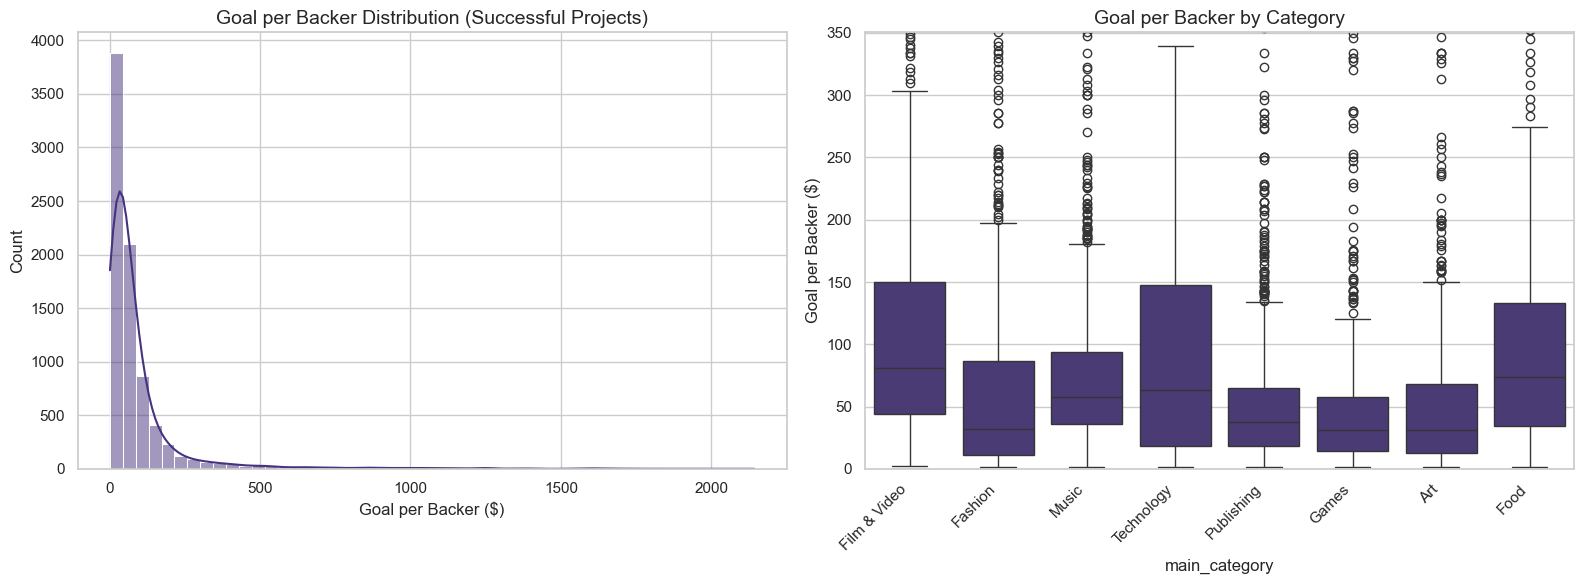


Median Goal per Backer by Category (Successful Projects):
                  median        mean  count
main_category                              
Comics         22.631410   41.746255    130
Crafts         27.777778  209.208698    345
Art            30.389805  115.540626    814
Games          31.201324  117.349528    522
Fashion        32.142857  231.014796    887
Design         33.333333  172.895140    216
Publishing     37.700128   90.272273   1254
Journalism     47.033498   95.098028    130
Photography    52.177858  105.960125    418
Music          57.471264  145.861156   1095
Technology     63.405797  350.650317    427
Theater        71.428571  151.002498     96
Food           74.074074  141.624642    433
Film & Video   80.808081  241.420451   1227
Dance          82.474227  196.515020     93


In [17]:
# --------------------------------------------------------
# 12. Calculating Goal/Backer Optimal Ratio
# --------------------------------------------------------

# This analysis uses backers_count which wouldn't be available at launch time
# But it's useful for understanding project dynamics

# Calculate goal per backer
successful_df = df[df['state'] == 'successful'].copy()
successful_df['goal_per_backer'] = successful_df['goal'] / successful_df['backers_count']

# Filter out extreme outliers for better visualization
q1 = successful_df['goal_per_backer'].quantile(0.01)
q3 = successful_df['goal_per_backer'].quantile(0.99)
filtered_gpb = successful_df[(successful_df['goal_per_backer'] >= q1) & 
                            (successful_df['goal_per_backer'] <= q3)]

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(filtered_gpb['goal_per_backer'], bins=50, kde=True)
plt.title('Goal per Backer Distribution (Successful Projects)', fontsize=14)
plt.xlabel('Goal per Backer ($)', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(x='main_category', y='goal_per_backer', 
            data=filtered_gpb[filtered_gpb['main_category'].isin(main_cat_counts.head(8).index)])
plt.title('Goal per Backer by Category', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Goal per Backer ($)', fontsize=12)
plt.ylim(0, filtered_gpb['goal_per_backer'].quantile(0.95))  # Limit y-axis for better visualization

plt.tight_layout()
plt.show()

# Calculate median goal per backer by category
gpb_stats = successful_df.groupby('main_category')['goal_per_backer'].agg(['median', 'mean', 'count'])
gpb_stats = gpb_stats.sort_values('median')

print("\nMedian Goal per Backer by Category (Successful Projects):")
print(gpb_stats)

In [18]:
# --------------------------------------------------------
# 13. Feature Engineering & Modeling Preparation
# --------------------------------------------------------

print("\n=== FEATURE ENGINEERING & MODELING PREPARATION ===")

# Create a dataframe with only launch features
df_for_modeling = df.copy()

# Create potential features for modeling
df_for_modeling['goal_usd'] = df_for_modeling['goal'] * df_for_modeling['static_usd_rate']
df_for_modeling['has_video'] = df_for_modeling['video'].astype(int)
df_for_modeling['is_staff_pick'] = df_for_modeling['staff_pick'].astype(int)
df_for_modeling['name_to_blurb_ratio'] = df_for_modeling['name_len'] / df_for_modeling['blurb_len']
df_for_modeling['project_duration_weeks'] = df_for_modeling['project_duration'] / 7

# Create a target variable (1 for successful, 0 for failed)
df_for_modeling['target'] = (df_for_modeling['state'] == 'successful').astype(int)

# Drop features that wouldn't be available at launch time
post_launch_features = [
    'pledged', 'backers_count', 'usd_pledged', 'state_changed_at', 
    'state_changed_at_weekday', 'state_changed_at_month', 'state_changed_at_day', 
    'state_changed_at_yr', 'state_changed_at_hr', 'spotlight'
]

for col in post_launch_features:
    if col in df_for_modeling.columns:
        df_for_modeling = df_for_modeling.drop(col, axis=1)

# Identify potential features for modeling
potential_features = [
    'goal', 'goal_usd', 'country', 'currency', 'is_staff_pick', 'has_video',
    'name_len', 'name_len_clean', 'blurb_len', 'blurb_len_clean',
    'name_to_blurb_ratio', 'show_feature_image', 'main_category', 'category',
    'deadline_weekday', 'deadline_month', 'deadline_day', 'deadline_yr', 'deadline_hr',
    'launched_at_weekday', 'launched_at_month', 'launched_at_day', 'launched_at_yr', 'launched_at_hr',
    'project_duration', 'project_duration_weeks', 'preparation_time',
    'goal_bins', 'duration_bins'
]

# Print potential features
print("\nPotential features for model building:")
available_features = [f for f in potential_features if f in df_for_modeling.columns]
print(available_features)


=== FEATURE ENGINEERING & MODELING PREPARATION ===

Potential features for model building:
['goal', 'goal_usd', 'country', 'currency', 'is_staff_pick', 'has_video', 'name_len', 'name_len_clean', 'blurb_len', 'blurb_len_clean', 'name_to_blurb_ratio', 'show_feature_image', 'main_category', 'category', 'deadline_weekday', 'deadline_month', 'deadline_day', 'deadline_yr', 'deadline_hr', 'launched_at_weekday', 'launched_at_month', 'launched_at_day', 'launched_at_yr', 'launched_at_hr', 'project_duration', 'project_duration_weeks', 'preparation_time', 'goal_bins', 'duration_bins']


In [19]:
# --------------------------------------------------------
# 14. Final Summary and Recommendations
# --------------------------------------------------------

print("\n=== FINAL SUMMARY AND RECOMMENDATIONS ===")

print("Key Success Factors:")
print("1. Staff Pick: Being selected as a staff pick increases success rate significantly")
print("2. Goal Amount: Lower goals (especially under $5,000) are much more likely to succeed")
print("3. Video: Projects with videos have higher success rates")
print("4. Project Duration: Medium length campaigns (30-45 days) perform better than very short or long ones")
print("5. Category: Choose category carefully - success rates vary widely by category")

print("\nTop Recommendations:")
print("1. Keep funding goals realistic and as low as possible")
print("2. Include a video with your project")
print("3. Plan for a campaign of 30-45 days")
print("4. Pay attention to project description length and quality")
print("5. Consider launching on a weekend and during peak months")

# Save processed data for modeling if needed
# df_for_modeling.to_csv('kickstarter_processed.csv', index=False)
print("\nEDA completed. Data is ready for modeling.")


=== FINAL SUMMARY AND RECOMMENDATIONS ===
Key Success Factors:
1. Staff Pick: Being selected as a staff pick increases success rate significantly
2. Goal Amount: Lower goals (especially under $5,000) are much more likely to succeed
3. Video: Projects with videos have higher success rates
4. Project Duration: Medium length campaigns (30-45 days) perform better than very short or long ones
5. Category: Choose category carefully - success rates vary widely by category

Top Recommendations:
1. Keep funding goals realistic and as low as possible
2. Include a video with your project
3. Plan for a campaign of 30-45 days
4. Pay attention to project description length and quality
5. Consider launching on a weekend and during peak months

EDA completed. Data is ready for modeling.
